In [177]:
# Implementation fuzzy system for washing machine

In [178]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [179]:
dirtiness = np.arange(0,101,1) #the degree of soiling of clothes (0:100)
fabric_type = np.array([0, 1, 2])  # Fabric types: 0 = Wool, 1 = Cotton, 2 = Plastic  
time = np.arange(0, 61, 1)  # Wash time in minutes  
intensity = np.arange(0, 11, 1)  # Wash intensity (0:10)  

In [180]:
dirtiness = np.arange(0,101,1) #the degree of soiling of clothes (0:100)
fabric_type = np.array([0, 1, 2])  # Fabric types: 0 = Wool, 1 = Cotton, 2 = Plastic  
time = np.arange(0, 61, 1)  # Wash time in minutes  
intensity = np.arange(0, 11, 1)  # Wash intensity (0:10)  

In [181]:
# membership function for types of fabrics

fabric_pashmi = fuzz.trimf(fabric_type,[0,0,1]) # wool
fabric_nakhi = fuzz.trimf(fabric_type ,[0,1,2]) #cotton
fabric_plastiki = fuzz.trimf(fabric_type,[1,2,2]) #plastic

In [182]:
# membership function for time 

time_short = fuzz.trimf(time , [0,0,30]) #short time
time_medium = fuzz.trimf(time , [0,30,60]) # medium time
time_long = fuzz.trimf(time ,[30,60,60]) #long time

In [183]:
# membership for intensity 

intensity_low = fuzz.trimf(intensity , [0,0,5]) #low
intensity_medium = fuzz.trimf(intensity , [0,5,10]) #medium
intensity_high = fuzz.trimf(intensity , [5,10,10]) #high


In [184]:
# plot for membership functions

def plot_membership_functions():
    plt.Figure(figsize = (12,10))
    

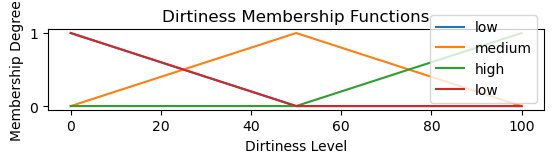

In [185]:
# dirtiness membership functions

plt.subplot(4,1,1)
plt.plot(dirtiness , dirt_low , label = 'low')
plt.plot(dirtiness , dirt_medium , label = 'medium')
plt.plot(dirtiness , dirt_high , label = 'high')
plt.plot(dirtiness , dirt_low , label = 'low')
plt.title('Dirtiness Membership Functions')  
plt.xlabel('Dirtiness Level')  
plt.ylabel('Membership Degree')  
plt.legend()  



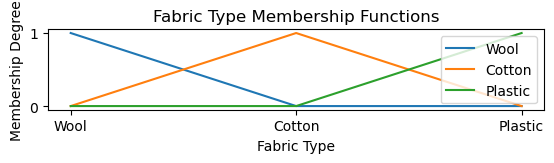

In [186]:
# fabric type for membership function

plt.subplot(4, 1, 2)  
plt.plot(fabric_type, fabric_pashmi, label='Wool')  
plt.plot(fabric_type, fabric_nakhi, label='Cotton')  
plt.plot(fabric_type, fabric_plastiki, label='Plastic')  
plt.title('Fabric Type Membership Functions')  
plt.xlabel('Fabric Type')  
plt.ylabel('Membership Degree')  
plt.xticks([0, 1, 2], ['Wool', 'Cotton', 'Plastic'])  
plt.legend()  

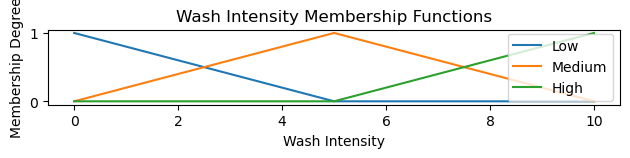

In [187]:
# intensity membership functions

plt.subplot(4, 1, 4)  
plt.plot(intensity, intensity_low, label='Low')  
plt.plot(intensity, intensity_medium, label='Medium')  
plt.plot(intensity, intensity_high, label='High')  
plt.title('Wash Intensity Membership Functions')  
plt.xlabel('Wash Intensity')  
plt.ylabel('Membership Degree')  
plt.legend()  
plt.tight_layout()  
plt.show()  


In [188]:
plot_membership_functions()
plt.show()

In [189]:
# fuzzy inference using rules

# 8. Fuzzy inference using rules  
def fuzzy_inference(dirt, fabric):  
    # Input degrees of membership  
    mu_dirt_low = fuzz.trimf(dirtiness, [0, 0, 50])  
    mu_dirt_medium = fuzz.trimf(dirtiness, [0, 50, 100])  
    mu_dirt_high = fuzz.trimf(dirtiness, [50, 100, 100])  

    # Calculate membership values for the incoming dirtiness  
    mu_dirt_low = fuzz.interp_membership(dirtiness, mu_dirt_low, dirt)  
    mu_dirt_medium = fuzz.interp_membership(dirtiness, mu_dirt_medium, dirt)  
    mu_dirt_high = fuzz.interp_membership(dirtiness, mu_dirt_high, dirt)  

    # Membership for fabric type  
    mu_fabric_pashmi = fuzz.trimf(fabric_type, [0, 0, 1])  
    mu_fabric_nakhi = fuzz.trimf(fabric_type, [0, 1, 2])  
    mu_fabric_plastiki = fuzz.trimf(fabric_type, [1, 2, 2])  

    # Calculate membership values for the incoming fabric type  
    mu_fabric_pashmi = fuzz.interp_membership(fabric_type, mu_fabric_pashmi, fabric)  
    mu_fabric_nakhi = fuzz.interp_membership(fabric_type, mu_fabric_nakhi, fabric)  
    mu_fabric_plastiki = fuzz.interp_membership(fabric_type, mu_fabric_plastiki, fabric)  

    # Apply rules (minimum for AND)  
    rule1 = np.minimum(mu_dirt_low, mu_fabric_pashmi)  # Low dirt, Wool  
    rule2 = np.minimum(mu_dirt_medium, mu_fabric_nakhi)  # Medium dirt, Cotton  
    rule3 = np.minimum(mu_dirt_high, mu_fabric_plastiki)  # High dirt, Plastic  
    rule4 = np.minimum(mu_dirt_high, mu_fabric_nakhi)  # High dirt, Cotton  

    return rule1, rule2, rule3, rule4  

In [190]:
# aggregating rules

def aggregate_rules(rules):  
    return np.maximum.reduce(rules)  # maximum aggregation  
    


In [191]:
# defuzzification
def defuzzify(output_mf, method='centroid'):  
    if isinstance(output_mf, np.ndarray):  # Check if output_mf is an array  
        return fuzz.defuzz(time, output_mf, method)  
    else:  
        return output_mf  # If output_mf is a single value, return it directly  



In [192]:
dirtiness_input = 70  # Example dirtiness level (0 to 100)  
fabric_type_input = 1  #  1 = Cotton  

# Perform fuzzy inference  
rules = fuzzy_inference(dirtiness_input, fabric_type_input)  
aggregated_result = aggregate_rules(rules)  

# Defuzzification to get the crisp output  
output_time = defuzzify(aggregated_result, method='centroid')  

print(f"Recommended wash time: {output_time:.2f} minutes")  


Recommended wash time: 0.60 minutes
